Problem Statement:
The dataset looks simple but it will help understand the identifying factor that can play a role in predicting the medical cost that has been billed by the insurance company. In this problem, Our aim is to predict the health insurance charges given the independent variables.

Source of the dataset: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset?resource=download

Data Definition
age : Age of the policyholder (Numeric)

sex: Gender of policyholder (Categoric)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

children: Number of children covered by health insurance / Number of dependents (Numeric)

smoker: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.(Categoric)

charges: Individual medical costs billed by health insurance. (Numerical)

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Data gathering

In [22]:
df = pd.read_csv("insurance.csv")


# Data cleaning and analysis

In [3]:
# display the top 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# .shape returns the dimension of the data
df.shape

(1338, 7)

In [5]:
# use .dtypes to view the data type of a variable
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#we will change the sex, smoker, and region datatypes to categorical types.
# convert object variable 'smoker' to (categorical) variable
df.sex = df.sex.astype('category')

# convert object variable 'smoker' to (categorical) variable
df.smoker = df.smoker.astype('category')

# convert 'object' variable region to (categorical) variable
df.region = df.region.astype('category')

In [7]:
# recheck the data types using .dtypes
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [8]:
# describe the numerical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#the average age of a policyholder is about 39 years. Here the mean bmi of a policyholder is 30 (the healthy bmi range is between 18.5 to 24.9).

In [9]:
# describe the categorical data
# include=category: selects the categorical features
df.describe(include = 'category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
#count - Total number of observations
#unique - Number of unique classes in a variable
#top - The most repeated class
#freq - Frequency of most repeated class

In [ ]:
df.groupby('region').size()  
# Is the data in the categorical attribute balanced? 
# Is there any bias hidden in the given data?

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data


,Total,Percentage of Missing Values
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [14]:
df_numeric_features = df.select_dtypes(include=np.number)
# filter numeric variables

In [15]:
# generate the correlation matrix
corr =  df_numeric_features.corr()
# print the correlation matrix
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


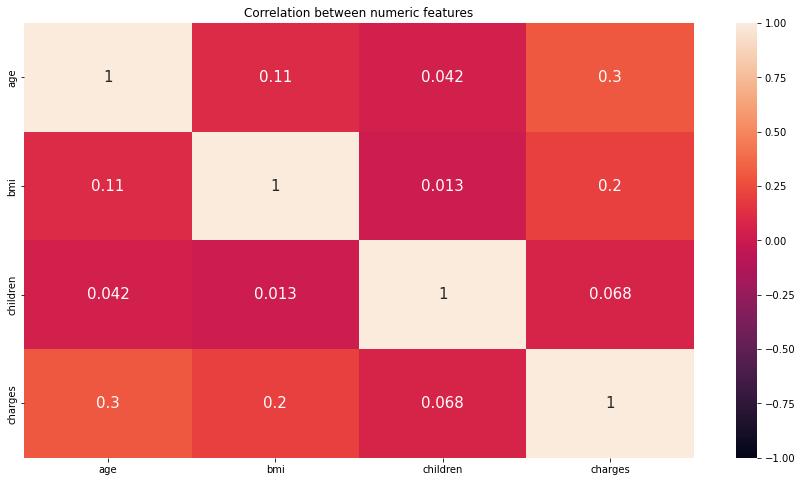

In [16]:
# set the figure size
plt.figure(figsize=(15, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 15})
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
plt.title('Correlation between numeric features')
plt.show()

It can be observed that the numeric variables are less correlated with each other since all the correlation coefficients are close to zero or 0.1. It implies that there will be less multicollinearity in the data.

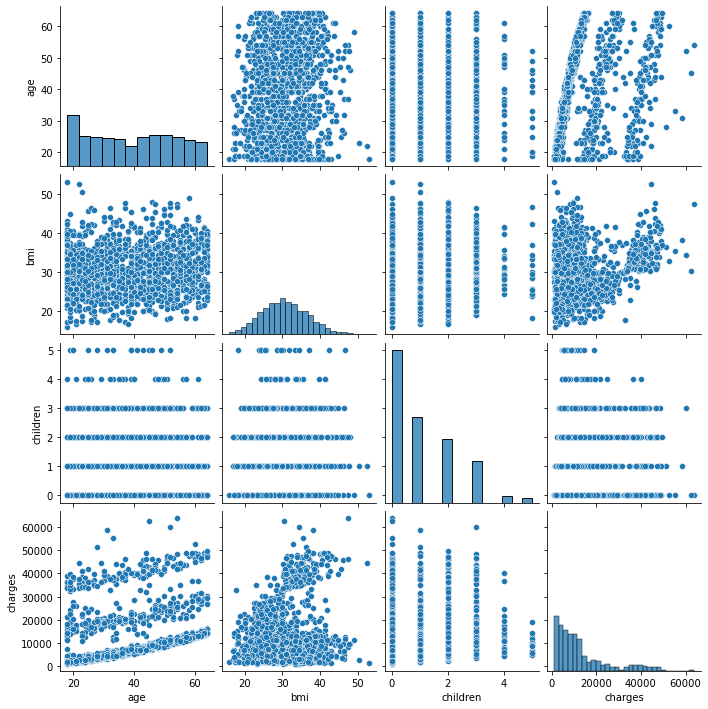

In [17]:
sns.pairplot(df, )

To analyse Categorical variables, I will build count plot of all the variables

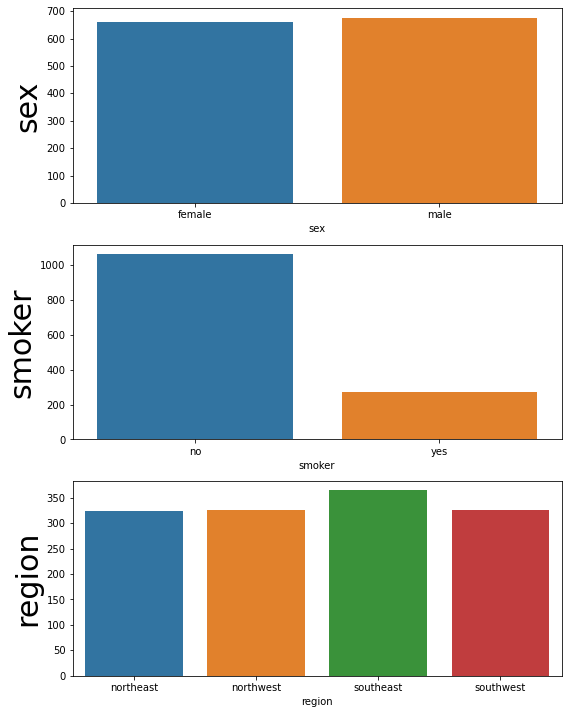

In [18]:
df_categoric_features = df.select_dtypes(include='category')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

for variable, subplot in zip(df_categoric_features, ax.flatten()):
    countplot = sns.countplot(x=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
    
# ax: specifies the axes object to draw the plot onto
plt.tight_layout()   
plt.show()

        

From the above plot we see that:

The number of males are females are nearly equal

Also the number of non smokers is significantly large

The different regions have distributed almost equally except the southeast which is slightly higher than all.

Analyze Relationship Between Target and Categorical Variables using The box-and-whisker plot

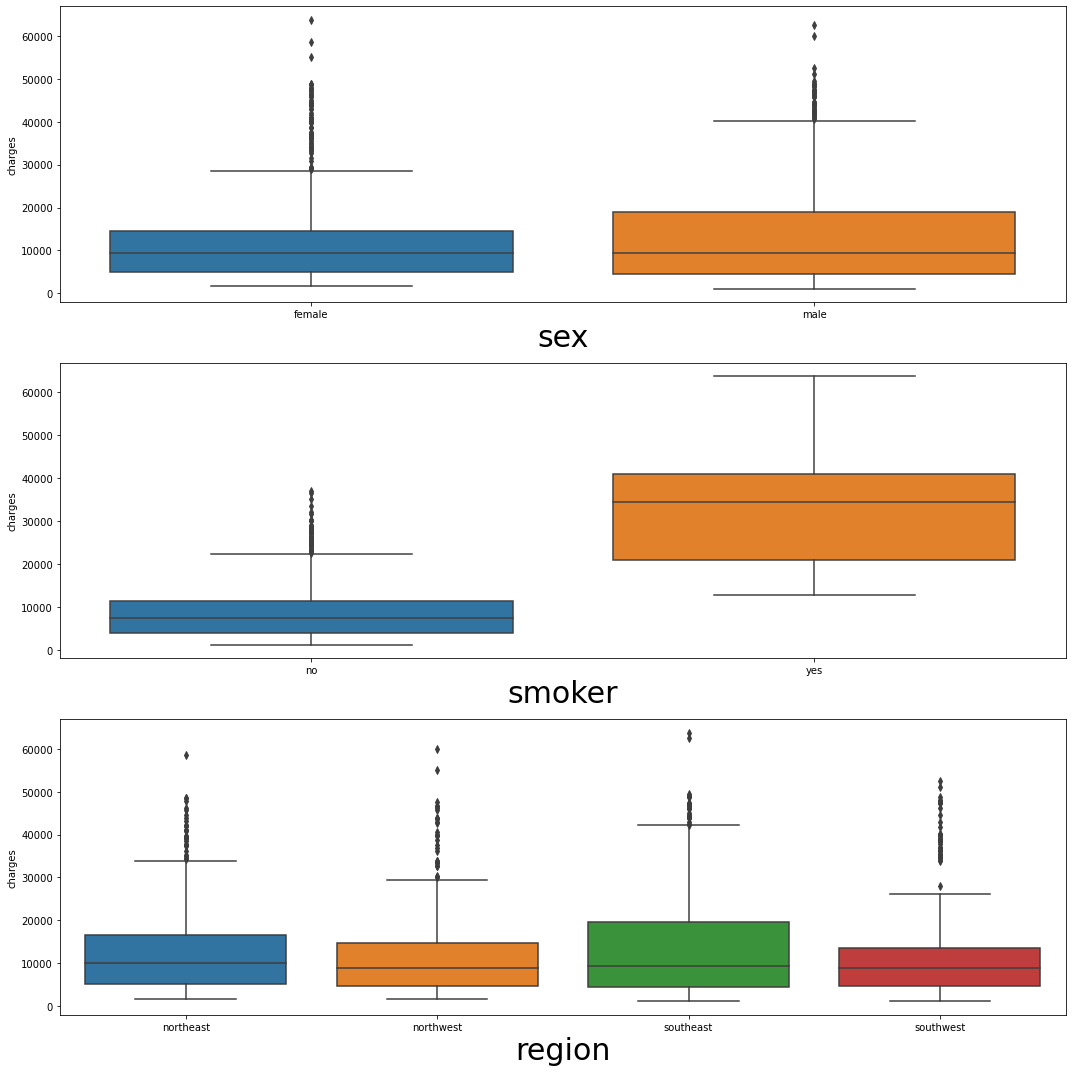

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    boxplt = sns.boxplot(x=variable, y='charges', data=df, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 30)
plt.tight_layout()  


As we can see the means of the charges across the gender are nearly the same.

The distribution of charges between the two categories, 'smoker' and 'non-smoker', are distinct enough to take smokers as a potentially good predictor of the charges amount.

We can see that the median of charges across the region are nearly equal and but the southeast charges have been distributed largely compared to others. This might have happened becuase the number of samples for the southeast is more.

In order to detect outliers in numerical data, we perform the following:

                1. Plot boxplot for numerical data

                2. Note the variables for which outliers are present

                3. Remove outliers by IQR method

                4. Plot boxplot to recheck for outliers

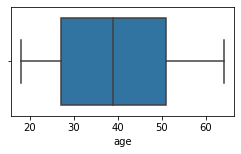

********************************************


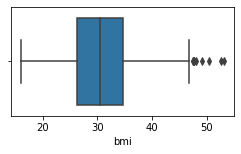

********************************************


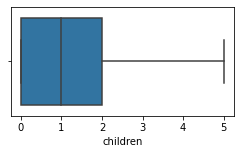

********************************************


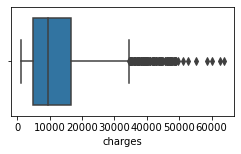

********************************************


In [20]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)

As we do not have sufficient data to analyze and train the model with a large sample, we are not going to remove the outliers. If needed we will transform the variables down the line.

# Data preprocessing

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable

In order to check for normality of our target variable,

Plot a histogram and also perform the Jarque-Bera test

If the data is not normally distributed, use log transformation to get near normally distributed data

Recheck for normality by plotting histogram and performing Jarque-Bera test

In [23]:
# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

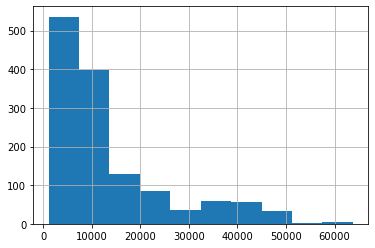

In [24]:
# check the distribution of target variable using hist()
df.charges.hist()

# display the plot
plt.show()

From the above plot, we can notice that the variable 'charges' is heavily right skewed and not normally distributed

The null and alternate hypothesis of Jarque-Bera and shapiro test are as follows:

H0: The data is normally distributed
H1: The data is not normally distributed

In [25]:
stat, p = stats.shapiro(df["charges"])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.815, p-value=0.000
The data is not normally distributed (reject H0)


Now we opt for log transformation in order to reduce the skewness. We will log transform the claim variable.

In [41]:
# log transformation for normality using np.log()
df['log_charges'] = np.log(df['charges'])

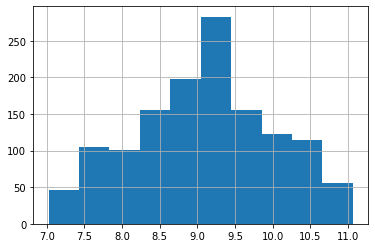

In [27]:
# plot the histogram using hist
df.log_charges.hist()

# display the plot
plt.show()

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of charges is significantly different across gender.

The null and alternate hypothesis of one-way anova are as follows:

H0: Population means all are equal
H1: Population means are not all equal

In [28]:
# perform one way anova for sex on claim using f_oneway()
f_oneway(df['charges'][df['sex'] == 'male'], 
             df['charges'][df['sex'] == 'female'])

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

 1. Filter numerical and categorical variables

 2. Dummy encode the catergorical variables

3. Concatenate numerical and dummy encoded categorical variables

In [29]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)
    

In [30]:
df_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

In [31]:
df_dummy.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Model selection and training

In [ ]:
#build a simple Linear model with linear regression using OLS (Ordinary Least Square) technique.

In [33]:
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

In [34]:
X = sm.add_constant(df_dummy.age)
y = df_dummy.charges

In [35]:
# build a model using OLS()
SLR = sm.OLS(y, X).fit()

# print the summary output
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           4.89e-29
Time:                        16:53:53   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.0

This model explains 0.89% of the variation in the dependent variable claim. The Durbin-Watson test statistics is 2.033 and indicates that there is no autocorrelation. The p-value of the JB test is nearly 0 and indicates that residuals are not normally distributed.

In [43]:
#build a full Linear model with linear regression using OLS (Ordinary Least Square) technique.
df_dummy.head(1)

,const,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.9,0,16884.924,0,1,0,0,1


In [45]:
df_dummy['log_charges'] = np.log(df_dummy['charges'])

In [46]:
# add the intercept column to the dataset
df_dummy = sm.add_constant(df_dummy)

X = df_dummy.drop(['charges','log_charges'], axis=1)

y = df_dummy[['log_charges','charges']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [48]:
linreg_full_model_withlog = sm.OLS(y_train['log_charges'], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     399.8
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.96e-304
Time:                        17:26:53   Log-Likelihood:                -618.13
No. Observations:                1003   AIC:                             1254.
Df Residuals:                     994   BIC:                             1298.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0775      0.084  

**This model explains 76.4% of the variation in the dependent variable charges. we can also see that Adjusted R2 is close to R2 which tells us that variables might not insignificant. The Durbin-Watson test statistics is 2.046 and indicates that there is no autocorrelation. Condition Number 311 suggests that there is no much multicollinearity. But the Jarque bera test says that errors are not normally distributed.

In [44]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])


In [49]:
# calculate the p-values for all the variables

linreg_full_model_withlog_pvalues = pd.DataFrame(linreg_full_model_withlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withlog_pvalues

,P-Value
const,0.000000e+00
age,1.801052e-160
bmi,4.336398e-08
children,3.835412e-15
sex_male,2.790516e-03
smoker_yes,7.729371e-240
region_northwest,2.061770e-01
region_southeast,3.111734e-04
region_southwest,3.375068e-03


In [53]:
insignificant_variabless = linreg_full_model_withlog_pvalues[
                                                        linreg_full_model_withlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_varr = insignificant_variabless.index

# convert the list of variables to 'list' type
insigni_varr = insigni_varr.to_list()

# get the list of insignificant variables
insigni_varr

['region_northwest']

In [50]:
#linreg_full_model_withoutlog
linreg_full_model_withoutlog = sm.OLS(y_train['charges'], X_train).fit()
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     383.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.23e-297
Time:                        17:29:55   Log-Likelihood:                -10160.
No. Observations:                1003   AIC:                         2.034e+04
Df Residuals:                     994   BIC:                         2.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.121e+04   1138.444  

**As we can see that the R2 is 0.755 and the Adjusted R2 is 0.753, which means that the model explains about 75% variation in the dependent variable. And we can see that the R2 and the Adjust R2 is slightly descreased but nor a significant drop. And we can see that p-value of the F stats is less than 0.05 which means the model is significant.

In [51]:
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,6.913282e-22
age,1.051488e-63
bmi,1.153134e-21
children,2.447908e-02
sex_male,4.867917e-01
smoker_yes,6.870848e-279
region_northwest,6.662576e-01
region_southeast,1.215568e-01
region_southwest,2.248616e-01


In [52]:
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

In [ ]:
# num of insigni variables decreased when we performed log transformation

In [54]:
# evaluate the model
# predict the charges using predict()
predicted_claim = linreg_full_model_withoutlog.predict(X_test)

# extract the 'charges' values from the test data
actual_claim = y_test['charges']

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [56]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

In [57]:
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

In [58]:
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)


In [59]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)


In [60]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065


**On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'charges' is higher than the other model, but not a significantly higher.

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

In order to build the model, we do the following:

                   1. Compute the interaction effect

                   2. Split the data into training and test sets

                   3. Build model using sm.OLS().fit()

                   4. Predict the values using test set

                   5. Compute accuracy measures

                   6. Tabulate the results

In [61]:
df_interaction = df_dummy.copy()
df_interaction['bmi_mul_smoker'] = df_interaction['bmi']*df_interaction['smoker_yes'] 
df_interaction.head()

,const,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges,bmi_mul_smoker
0,1.0,19,27.900,0,16884.92400,0,1,0,0,1,9.734176,27.9
1,1.0,18,33.770,1,1725.55230,1,0,0,1,0,7.453302,0.0
2,1.0,28,33.000,3,4449.46200,1,0,0,1,0,8.400538,0.0
3,1.0,33,22.705,0,21984.47061,1,0,1,0,0,9.998092,0.0
4,1.0,32,28.880,0,3866.85520,1,0,1,0,0,8.260197,0.0


In [62]:
X = df_interaction.drop(['charges','log_charges'], axis=1)

In [63]:
y = df_interaction['charges']


In [64]:
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)


In [65]:
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     585.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:42:00   Log-Likelihood:                -9942.7
No. Observations:                1003   AIC:                         1.991e+04
Df Residuals:                     993   BIC:                         1.995e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1774.7556   1003.103  

**This model explains 84.1% of the variation in dependent variable charges.The Durbin-Watson test statistics is 2.030 and indicates that the is no autocorrelation. The Condition Number is 663 suggests that there is a moderate(low) collinearity. The collinearity is likely to increase because of the interaction effect.

In [66]:
predicted_claim = linreg_with_interaction.predict(X_test_interaction)
actual_claim = y_test

In [67]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [68]:
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439


**The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.

Gradient Descent is an optimization technique in machine learning. It is an iterative method which is used to find the values of the parameters of a function that minimizes the cost function. 
For gradient decent we use the complete dataset to get the optimal in a less noisy or less random manner. But the problem arises when our datasets get really huge, say you have a million samples in your dataset, it becomes computationally very expensive to perform. This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.
1. Fit the linear regression using the SGD

2. Predict the values using test set

3. Compute accuracy measures

4. Tabulate the results

Scaling is important when performing gradient descent because it can significantly affect the convergence rate of the algorithm.
Since the newly bmi_mul_smoke_1 variable had impacted the model in a better way, we will use the variable for the upcoming models as well.

In [69]:
from sklearn.preprocessing import StandardScaler


In [70]:
df_numeric_features['bmi_mul_smoker'] = df_numeric_features.bmi*df_categoric_features["smoker_yes"]
y = df_numeric_features['charges']

In [72]:
df_numeric_features = df_numeric_features.drop(['charges'],axis=1)

In [73]:
X_scaled = pd.concat([df_numeric_features.reset_index(drop=True), df_categoric_features.reset_index(drop=True)], axis = 1)
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=1)

In [74]:
scaler_ind = StandardScaler()

scaler_ind.fit(X_train_scaled)
X_train_scaled = pd.DataFrame(scaler_ind.transform(X_train_scaled),columns=X_train_scaled.columns)

scaler_ind.fit(X_test_scaled)
X_test_scaled = pd.DataFrame(scaler_ind.transform(X_test_scaled),columns=X_test_scaled.columns)

In [75]:
X_train_scaled.head()

,age,bmi,children,bmi_mul_smoker,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.779886,-0.805683,-0.907059,-0.504981,-1.027292,-0.517702,-0.565453,-0.605380,1.726314
1,-1.280350,-0.814660,0.739602,-0.504981,0.973434,-0.517702,-0.565453,-0.605380,-0.579269
2,0.149548,1.554541,-0.907059,-0.504981,0.973434,-0.517702,-0.565453,1.651855,-0.579269
3,1.722435,0.477260,1.562933,-0.504981,0.973434,-0.517702,-0.565453,1.651855,-0.579269
4,1.793930,-0.706116,-0.907059,-0.504981,0.973434,-0.517702,-0.565453,-0.605380,-0.579269


In [76]:
# scaling the target variable
scaler_target = StandardScaler()
scaler_target.fit(np.array(y_train_scaled).reshape((-1,1)))
y_train_scaled = scaler_target.fit_transform(np.array(y_train_scaled).reshape((-1,1)))


scaler_target.fit(np.array(y_test_scaled).reshape((-1,1)))
y_test_scaled = scaler_target.fit_transform(np.array(y_test_scaled).reshape((-1,1)))

In [77]:
from sklearn.linear_model import SGDRegressor

# build the model
linreg_with_SGD = SGDRegressor()

# we fit our model with train data
linreg_with_SGD = linreg_with_SGD.fit(X_train_scaled, y_train_scaled)

In [78]:
linreg_with_SGD_predictions = scaler_target.inverse_transform(linreg_with_SGD.predict(X_test_scaled).reshape(-1,1))
# we use predict() to predict our values
# Take the inverse of the prediction as we have done the transformation

In [79]:
# calculate mse by taking inverse of the data as we did scaling 
linreg_SGD_mse = mean_squared_error(y_test,linreg_with_SGD_predictions)

# calculate rmse
linreg_SGD_rmse = np.sqrt(linreg_SGD_mse)

# calculate R-squared
linreg_SGD_r_squared = r2_score(y_test, linreg_with_SGD_predictions)

# calculate Adjusted R-squared
linreg_SGD_adjusted_r_squared = 1 - (1-linreg_SGD_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [80]:
# compile the required information
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD",
                     'RMSE': linreg_SGD_rmse ,
                     'R-Squared': linreg_SGD_r_squared,
                     'Adj. R-Squared': linreg_SGD_adjusted_r_squared   
                   })

In [81]:
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)


In [82]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199


In [83]:
#Now we perform Linear Regression using Stochastic Gradient Descent with GridSearchCV. 
from sklearn.model_selection import GridSearchCV
param_grid = { 'alpha': 10.0 ** -np.arange(1, 7), 
        
               'loss': ['squared_loss'], 
    
               'penalty': ['l2', 'l1', 'elasticnet'],
    
               'learning_rate': ['constant', 'optimal', 'invscaling']
}


# alpha is regularization term usually in the range 10.0**-np.arange(1,7).
# this will generate different alpha values like 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06

# loss="squared_loss": Ordinary least squares, 

# "l2": L2 norm penalty on coefficients (ridge regression), 
# "l1": L1 norm penalty on coefficients(lasso regression), "elasticnet": Convex combination of L2 and L1    
   
# The learning rate can be either constant or gradually decaying

In [84]:
# using sklearn’s GridSearchCV, we define our grid of parameters to search over and then run the grid search
reg = GridSearchCV(linreg_with_SGD, param_grid)

# fit the model on train data
reg.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [85]:
# print the best parameters
# print best alpha value
print('Best alpha:', reg.best_estimator_.alpha)

# print best tolerance
print('Best tol:', reg.best_estimator_.tol) 

# print best starting rate (Use eta0 to specify the starting learning)
print('Best eta0:', reg.best_estimator_.eta0)

# print best learning rate
print('Best learning rate:', reg.best_estimator_.learning_rate) 

Best alpha: 0.0001
Best tol: 0.001
Best eta0: 0.01
Best learning rate: constant


In [86]:
#We have obtained the optimal parameters. Now substituting these values in SGDRegressor() we build the model.
linreg_SGD_using_best_parameter = SGDRegressor(alpha=0.0001,
                                               tol=0.001,
                                               eta0=0.01, 
                                               learning_rate='constant')

# fit the SGD model using best parameter
linreg_SGD_using_best_parameter.fit(X_train_scaled,y_train_scaled)

SGDRegressor(learning_rate='constant')

In [87]:
linreg_SGD_using_best_parameter_predictions =  scaler_target.inverse_transform(linreg_SGD_using_best_parameter.predict
                                                                               (X_test_scaled).reshape(-1,1))
# calculate mse
linreg_SGD_using_best_parameter_mse = mean_squared_error(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate rmse
linreg_SGD_using_best_parameter_rmse = np.sqrt(linreg_SGD_using_best_parameter_mse)

# calculate R-squared
linreg_SGD_using_best_parameter_r_squared = r2_score(y_test, linreg_SGD_using_best_parameter_predictions)

# calculate Adjusted R-squared
linreg_SGD_using_best_parameter_adjusted_r_squared = 1 - (1-linreg_SGD_using_best_parameter_r_squared)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1)

In [91]:
linreg_full_model_SGD = pd.Series({
                     'Model_Name': "Linear Regression SGD using grid search cv",
                     'RMSE': linreg_SGD_using_best_parameter_rmse ,
                     'R-Squared': linreg_SGD_using_best_parameter_r_squared,
                     'Adj. R-Squared': linreg_SGD_using_best_parameter_adjusted_r_squared   
                   })
score_card = score_card.append(linreg_full_model_SGD, ignore_index = True)
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160


In [92]:
score_card.drop(4, inplace=True)

In [93]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
5,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160


In [96]:
# feature selection
!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as sfs


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [98]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Build step forward feature selection on linear regression model reg
sfs1 = sfs(reg, k_features = 5, forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_interaction, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished

[2023-11-19 18:33:26] Features: 1/5 -- score: 0.7176532921343416[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-11-19 18:33:26] Features: 2/5 -- score: 0.8127379214940987[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-11-19 18:33:26] Features: 3/5 -- score: 0.8345449975695903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

<Figure size 3600x3600 with 0 Axes>

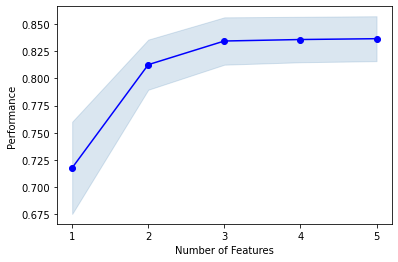

In [99]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs
plt.figure(figsize=(50,50))
fig1 = plt_sfs(sfs1.get_metric_dict(), kind= 'std_dev') 
plt.show()

The get_metric_dict method is used to retrieve a dictionary containing information about the performance of the model at each step of the Sequential Feature Selection process. 

In [100]:
result = pd.DataFrame(sfs1.get_metric_dict()).T
result = result[['feature_idx','avg_score','feature_names']]
imp_vars_forward = list(result.feature_names[result['avg_score'] == max(result.avg_score)])
imp_vars_forward

[('age', 'children', 'sex_male', 'smoker_yes', 'bmi_mul_smoker')]

In [101]:
# Build step backward feature selection
sfs2 = sfs(reg, k_features = 5, forward=False,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform Backward selection
sfs2 = sfs2.fit(X_train_interaction, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2023-11-19 18:39:35] Features: 9/5 -- score: 0.8364040779692496[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-11-19 18:39:36] Features: 8/5 -- score: 0.8365358167041187[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-11-19 18:39:36] Features: 7/5 -- score: 0.8366582900854592[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [102]:
sfs2.k_feature_names_


('age', 'children', 'sex_male', 'smoker_yes', 'bmi_mul_smoker')

**As we can see that Forward Feature Selection and Backward Feature Selection methods are giving the same features. So we can conclude that these features are more significant in indenticing the patterns.

In [105]:
#Let's create a variable to store the important features.
imp_vars_forward = [imp_vars_forward[0][i] for i in range(len(imp_vars_forward[0]))]


In [106]:
# Let's build OLS model with best features
linreg_model_with_forward_selection = sm.OLS(y_train, X_train_interaction[imp_vars_forward]).fit()

In [107]:
print(linreg_model_with_forward_selection.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              2506.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:45:53   Log-Likelihood:                         -9953.3
No. Observations:                1003   AIC:                                  1.992e+04
Df Residuals:                     998   BIC:                                  1.994e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
#As we can see that R2 and Adjusted R2 have increased significantly and both scores are exactly the same 0.926.

In [108]:
# predict the 'charges' using predict()
predicted_claim = linreg_model_with_forward_selection.predict(X_test_interaction[imp_vars_forward])

# extract the 'charges' values from the test data
actual_claim = y_test

In [109]:
# calculate rmse using rmse()
linreg_model_with_forward_selection_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_forward_selection_rsquared = linreg_model_with_forward_selection.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_forward_selection_rsquared_adj = linreg_model_with_forward_selection.rsquared_adj 

In [110]:
linreg_with_interaction_metrics_sfs = pd.Series({
                     'Model_Name': "linreg_model_with_forward_selection",
                     'RMSE': linreg_model_with_forward_selection_rmse,
                     'R-Squared': linreg_model_with_forward_selection_rsquared,
                     'Adj. R-Squared': linreg_model_with_forward_selection_rsquared_adj     
                   })

score_card = score_card.append(linreg_with_interaction_metrics_sfs, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788


**As we can see that R2 and Adjusted R2 scores are the same and they have gone up significantly. We can also see that the RMSE value is also less compared to most of the other models.

In [111]:
#Linear Regression model from SKLearn
LR_model = LinearRegression()
LR_model.fit(X_train_interaction[imp_vars_forward],y_train)
LR_model_predictions = LR_model.predict(X_test_interaction[imp_vars_forward])
LR_model_mse = mean_squared_error(y_test, LR_model_predictions)
LR_model_rmse = np.sqrt(LR_model_mse)
LR_model_r_squared = r2_score(y_test, LR_model_predictions)
LR_model_Ad_r_squared = 1 - (1-LR_model_r_squared)*(len(y_test)-1)/(len(y_test)- len(imp_vars_forward)-1)

In [112]:
linreg_sklearn = pd.Series({
                     'Model_Name': "Linear Regression using SKLearn",
                     'RMSE': LR_model_rmse ,
                     'R-Squared': LR_model_r_squared,
                     'Adj. R-Squared': LR_model_Ad_r_squared   
                   })
score_card = score_card.append(linreg_sklearn, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953


In [ ]:
# To avoid overfitting problem when dealing with any new dataset, we can apply regularisation.

In [113]:
# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

 It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. 

In [114]:
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train_interaction, y_train)


Ridge(alpha=1, max_iter=500)

In [115]:
# predict the 'charges' using predict()
predicted_charges = ridge.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_charges = y_test

In [116]:
# calculate mse
ridge_mse = mean_squared_error(y_test, predicted_charges)

# calculate rmse
ridge_rmse = np.sqrt(ridge_mse)

# calculate R-squared
ridge_r2 = r2_score(y_test, predicted_charges)

# calculate Adjusted R-squared
ridge_adjr2 = 1 - (1-ridge_r2)*(len(y_test)-1)/(len(y_test)- X_test_interaction.shape[1]-1)

In [117]:
# compile the required information
ridge_model_score = pd.Series({
                     'Model_Name': "Ridge model with alpha 1",
                     'RMSE': ridge_rmse,
                     'R-Squared': ridge_r2,
                     'Adj. R-Squared': ridge_adjr2     
                   })

score_card = score_card.append(ridge_model_score, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953
7,Ridge model with alpha 1,0.836871,0.831836,4684.378641


In [118]:
# 'alpha' assigns the regularization strength to the model
ridge_2 = Ridge(alpha = 2)

# fit the model on train set
ridge_2.fit(X_train_interaction, y_train)

Ridge(alpha=2)

In [119]:
# predict the 'charges' using predict()
predicted_charges = ridge_2.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_charges = y_test

In [120]:
# calculate mse
ridge_mse = mean_squared_error(y_test, predicted_charges)

# calculate rmse
ridge_rmse = np.sqrt(ridge_mse)

# calculate R-squared
ridge_r2 = r2_score(y_test, predicted_charges)

# calculate Adjusted R-squared
ridge_adjr2 = 1 - (1-ridge_r2)*(len(y_test)-1)/(len(y_test)- X_test_interaction.shape[1]-1)

In [122]:
ridge_model_score = pd.Series({
                     'Model_Name': "Ridge model with alpha 2",
                     'RMSE': ridge_rmse,
                     'R-Squared': ridge_r2,
                     'Adj. R-Squared': ridge_adjr2     
                   })
score_card = score_card.append(ridge_model_score, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953
7,Ridge model with alpha 1,0.836871,0.831836,4684.378641
8,Ridge model with alpha 2,0.835770,0.830701,4700.157107


**As we can see that Ridge model with alpha 1 is performing better than the model with high alpha, this indicates that less penalization effect is better for this data.

In [123]:
lasso = Lasso(alpha = 0.1, max_iter = 500)

# fit the model on train set
lasso.fit(X_train_interaction, y_train)

Lasso(alpha=0.1, max_iter=500)

In [124]:
# predict the 'charges' using predict()
predicted_charges = lasso.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_charges = y_test

In [125]:
# calculate mse
lasso_mse = mean_squared_error(y_test, predicted_charges)

# calculate rmse
lasso_rmse = np.sqrt(lasso_mse)

# calculate R-squared
lasso_r2 = r2_score(y_test, predicted_charges)

# calculate Adjusted R-squared
lasso_adjr2 = 1 - (1-lasso_r2)*(len(y_test)-1)/(len(y_test)- X_test_interaction.shape[1]-1)

In [126]:
lasso_model_score = pd.Series({
                     'Model_Name': "Lasso model",
                     'RMSE': lasso_rmse,
                     'R-Squared': lasso_r2,
                     'Adj. R-Squared': lasso_adjr2     
                   })

score_card = score_card.append(lasso_model_score, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953
7,Ridge model with alpha 1,0.836871,0.831836,4684.378641
8,Ridge model with alpha 2,0.835770,0.830701,4700.157107
9,Lasso model,0.837664,0.832653,4672.980574


**As we can see that Lasso model has reduced the rmse value more when we compared it to the Ridge model. 
but we also have to visualising which model is supressing coefficients more

NameError: name 'plot_coefficients' is not defined

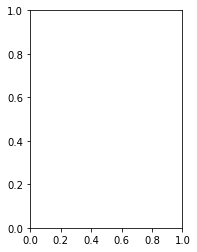

In [131]:
plt.subplot(1,2,1)
plot_coefficients(ridge, 'Ridge Regression',False)

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression',False)

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

Elastic net technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [127]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train_interaction, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

In [128]:
# predict the 'charges' using predict()
predicted_charges = enet.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_charges = y_test

In [129]:
# calculate mse
enet_mse = mean_squared_error(y_test, predicted_charges)

# calculate rmse
enet_rmse = np.sqrt(enet_mse)

# calculate R-squared
enet_r2 = r2_score(y_test, predicted_charges)

# calculate Adjusted R-squared
enet_adjr2 = 1 - (1-enet_r2)*(len(y_test)-1)/(len(y_test)- X_test_interaction.shape[1]-1)

In [130]:
enet_model_score = pd.Series({
                     'Model_Name': "Elastic Net model",
                     'RMSE': enet_rmse,
                     'R-Squared': enet_r2,
                     'Adj. R-Squared': enet_adjr2     
                   })

score_card = score_card.append(enet_model_score, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953
7,Ridge model with alpha 1,0.836871,0.831836,4684.378641
8,Ridge model with alpha 2,0.835770,0.830701,4700.157107
9,Lasso model,0.837664,0.832653,4672.980574


In [ ]:
#As we can see that Lasso model has reduced the rmse value more when we compared it to the Ridge and elastic model. 

In [ ]:
## Hyperparameter tuning to find the best learning rate for the lasso model

In [132]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator =lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
lasso_grid.fit(X_train_interaction, y_train)
print('Best parameters for lasso Regression: ', lasso_grid.best_params_, '\n')

Best parameters for lasso Regression:  {'alpha': 0.1} 



In [ ]:
#build the lasso model with an alpha of 0.1

In [133]:
lasso_best_alpha = Lasso(alpha = 0.1, max_iter = 500)

# fit the model on train set
lasso_best_alpha.fit(X_train_interaction, y_train)

Lasso(alpha=0.1, max_iter=500)

In [134]:
# predict the 'charges' using predict()
predicted_charges = lasso_best_alpha.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_charges = y_test

In [135]:
# calculate mse
lasso_mse = mean_squared_error(y_test, predicted_charges)

# calculate rmse
lasso_rmse = np.sqrt(ridge_mse)

# calculate R-squared
lasso_r2 = r2_score(y_test, predicted_charges)

# calculate Adjusted R-squared
lasso_adjr2 = 1 - (1-ridge_r2)*(len(y_test)-1)/(len(y_test)- X_test_interaction.shape[1]-1)

In [136]:
lasso_model_score = pd.Series({
                     'Model_Name': "lasso model with alpha 0.1",
                     'RMSE': lasso_rmse,
                     'R-Squared': lasso_r2,
                     'Adj. R-Squared': lasso_adjr2     
                   })

score_card = score_card.append(lasso_model_score, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model without log of target variable,0.755314,0.753344,5982.567065
1,Linreg full model with log of target variable,0.762914,0.761006,5982.567065
2,linreg_with_interaction,0.841378,0.839940,4672.893439
3,Linear Regression SGD,0.798504,0.792924,5206.181199
4,Linear Regression SGD using grid search cv,0.831293,0.826621,4763.787160
5,linreg_model_with_forward_selection,0.926234,0.925864,4813.077788
6,Linear Regression using SKLearn,0.834516,0.832001,4718.071953
7,Ridge model with alpha 1,0.836871,0.831836,4684.378641
8,Ridge model with alpha 2,0.835770,0.830701,4700.157107
9,Lasso model,0.837664,0.832653,4672.980574


Cross-validation is a resampling technique used in machine learning to assess how well a model will generalize to an independent dataset. It helps in evaluating a model's performance by splitting the dataset into multiple subsets, training the model on some of these subsets, and testing it on the remaining data.

In [140]:
from sklearn.model_selection import cross_val_score
X_train_subset = X_train_interaction[:1000]  # Adjust the size as needed
y_train_subset = y_train[:1000]

# Perform cross-validation on the subset
scores = cross_val_score(lasso, X=X_train_subset, y=y_train_subset, cv=10, scoring='r2', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    4.4s remaining:    1.4s


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


**conclusion : the linear regression model with interaction algorithm and Lasso model are the most accurate and giving the lowest RMSE. Lasso model will be perfect and can be suggested to insurance companies as it will perform better in production.